# Defining single-chain Structure Factor

### How to evaluate:
1) Fourier transform of pair correlation function (466 Lec 4)

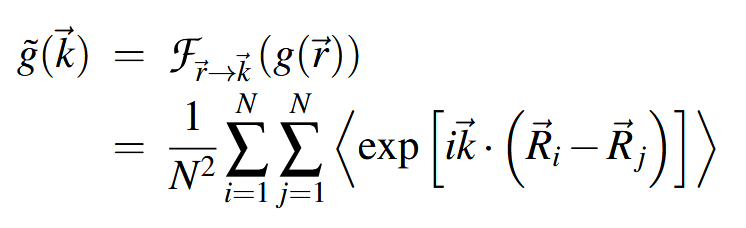


    a) Laplace inversion of wlc Green's function in Fourier-Laplace space (wlcstat doc)
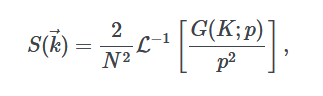
    


2) I_s(q) / I_s(q=0) (466 Lec 7, Rubinstein 2.8.2)
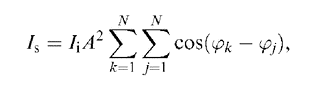
 
### Why it matters:

 "correlating scattering experiments with theoretical models provides insight into the physical behavior in polymeric fluids"
 
 generally, can tell error in [R_ij] -> at small scattering wavevector q, can compare <R_g^2>
 
 Experimentally verify theory polymer behavior in presence of different solvents

Fundamentally, any structure facot is essentially letting you know about how densities correlate
AB structure factor- at some position with vol frac A, what is the probability of vol frac B a certain distance away

#### meaning of single-chain?
Experimental result is a summation of monomer on a chain- makes sense

Analytical result (at small q) averaging over ensemble? single chain != in isolation?

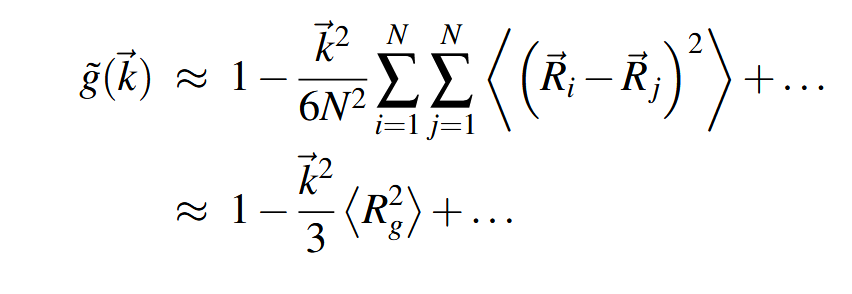



#### How does solvent enviroment impact these results?

structure factor essentially only depends on chain conformation and scattering wavevector


but, for the analytical solution, introducing interactions (bead-bead, bead-solvent) would change polymer conformations


Are these interactions considered in the evaluation of structure factor? (quasi-chemical solution model

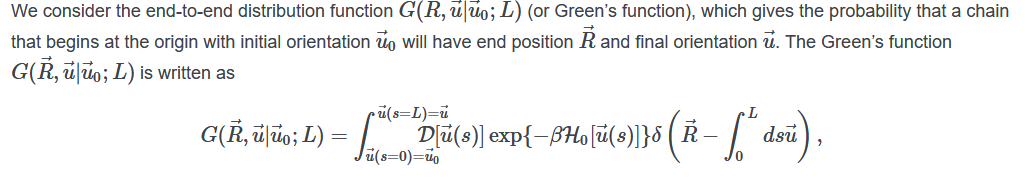

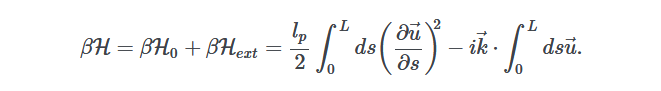

A = 1, B = 0

In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import wlcave as wlcave #need to path correctly!
import matplotlib.cm as cm
import sys
from wlcstat.wlcstruc import *
import itertools

#for data processing
import os
import operator
import xlrd

In [2]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
import seaborn as sns

Two appraoches: 

- Fourier transform of pair correlation function
- Ratio of I_scattered(q) / I_scattered(q=0)

### Simulation data:

# AB melt:

# lambda = 0 (ideal random), N_m = 0.05 (rigid)

##### chi = 0 lambda = 0, N_m = 0.05 (rigid)

In [4]:
r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=0.00_lam=0_rigid/all_rs/"
consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=0.00_lam=0_rigid/consts.txt"
chi0_lam0_melt = [r_path, consts_path]

n_p = 2000

# lambda = -.5 (biased alternating), N_m = 5 (flexible)

##### chi = 0 lambda = -.5 (biased alternating), N_m = 5 (flexible)

In [5]:
chi_zero_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=0.00_lam=-.5_flexible/all_rs/"
chi_zero_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=0.00_lam=-.5_flexible/consts.txt"
chi0_melt = [chi_zero_r_path, chi_zero_consts_path]

n_p = 2000

##### chi = 1.666 (2 * X_s)  lambda = -.5 (biased alternating), N_m = 5 (flexible)

In [6]:
chi_1p66_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=1.66_lam=-.5_flexible/all_rs/"
chi_1p66_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=1.66_lam=-.5_flexible/consts.txt"
chi1p66 = [chi_1p66_r_path, chi_1p66_consts_path]

n_p = 2000

##### chi = 3 (~4 * X_s)  lambda = -.5 (biased alternating), N_m = 5 (flexible)

In [7]:
chi_3p00_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=3.00_lam=-.5_flexible/all_rs/"
chi_3p00_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=3.00_lam=-.5_flexible/consts.txt"
chi3p00 = [chi_3p00_r_path, chi_3p00_consts_path]

n_p = 2000

##### chi = 4 (~5 * X_s)  lambda = -.5 (biased alternating), N_m = 5 (flexible)

In [8]:
chi_4p00_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=4.00_lam=-.5_flexible/all_rs/"
chi_4p00_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_melt/X=4.00_lam=-.5_flexible/consts.txt"
chi4p00 = [chi_4p00_r_path, chi_4p00_consts_path]

n_p = 2000

# AB solution:

#### all RIGID, IDEALLY RANDOM

# original sim- non-interacting solvent (X_as = X_bs = 0)

## 1000 polymers- phi_p = 0.5

In [9]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.00_lam=0_rigid/consts.txt"
chi0_1000_orig = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.20_lam=0_rigid/consts.txt"
chi0p2_1000_orig = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.40_lam=0_rigid/consts.txt"
chi0p4_1000_orig = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.60_lam=0_rigid/consts.txt"
chi0p6_1000_orig = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=0.80_lam=0_rigid/consts.txt"
chi0p8_1000_orig = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/original/X=1.00_lam=0_rigid/consts.txt"
chi1_1000_orig = [chi_r_path, chi_consts_path]

n_p = 1000

## 1250 polymers

## 1500 polymers

## 1750 polymers

## 2000 polymers

In [10]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.00_lam=0_rigid/consts.txt"
chi0_2000_orig = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.20_lam=0_rigid/consts.txt"
chi0p2_2000_orig = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.40_lam=0_rigid/consts.txt"
chi0p4_2000_orig = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.60_lam=0_rigid/consts.txt"
chi0p6_2000_orig = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=0.80_lam=0_rigid/consts.txt"
chi0p8_2000_orig = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/original/X=1.00_lam=0_rigid/consts.txt"
chi1_2000_orig = [chi_r_path, chi_consts_path]

n_p = 2000

# edited sim- selective solvent (X_ab = X_bs, X_as = 0)

## 1000 polymers

In [11]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.00_lam=0_rigid/consts.txt"
chi0_1000_edit = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.20_lam=0_rigid/consts.txt"
chi0p2_1000_edit = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.40_lam=0_rigid/consts.txt"
chi0p4_1000_edit = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.60_lam=0_rigid/consts.txt"
chi0p6_1000_edit = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=0.80_lam=0_rigid/consts.txt"
chi0p8_1000_edit = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=1.00_lam=0_rigid/consts.txt"
chi1_1000_edit = [chi_r_path, chi_consts_path]

#X = 2.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=2.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=2.00_lam=0_rigid/consts.txt"
chi2_1000_edit = [chi_r_path, chi_consts_path]

#X = 3.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=3.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=3.00_lam=0_rigid/consts.txt"
chi3_1000_edit = [chi_r_path, chi_consts_path]

#X = 4.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=4.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=4.00_lam=0_rigid/consts.txt"
chi4_1000_edit = [chi_r_path, chi_consts_path]

#X = 5.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=5.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1000_polymers/edited/X=5.00_lam=0_rigid/consts.txt"
chi5_1000_edit = [chi_r_path, chi_consts_path]

## 1250 polymers

In [12]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.00_lam=0_rigid/consts.txt"
chi0_1250_edit = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.20_lam=0_rigid/consts.txt"
chi0p2_1250_edit = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.40_lam=0_rigid/consts.txt"
chi0p4_1250_edit = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.60_lam=0_rigid/consts.txt"
chi0p6_1250_edit = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=0.80_lam=0_rigid/consts.txt"
chi0p8_1250_edit = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=1.00_lam=0_rigid/consts.txt"
chi1_1250_edit = [chi_r_path, chi_consts_path]

#X = 2.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=2.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=2.00_lam=0_rigid/consts.txt"
chi2_1250_edit = [chi_r_path, chi_consts_path]

#X = 3.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=3.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=3.00_lam=0_rigid/consts.txt"
chi3_1250_edit = [chi_r_path, chi_consts_path]

#X = 4.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=4.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=4.00_lam=0_rigid/consts.txt"
chi4_1250_edit = [chi_r_path, chi_consts_path]

#X = 5.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=5.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1250_polymers/edited/X=5.00_lam=0_rigid/consts.txt"
chi5_1250_edit = [chi_r_path, chi_consts_path]

## 1500 polymers

In [13]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.00_lam=0_rigid/consts.txt"
chi0_1500_edit = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.20_lam=0_rigid/consts.txt"
chi0p2_1500_edit = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.40_lam=0_rigid/consts.txt"
chi0p4_1500_edit = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.60_lam=0_rigid/consts.txt"
chi0p6_1500_edit = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=0.80_lam=0_rigid/consts.txt"
chi0p8_1500_edit = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=1.00_lam=0_rigid/consts.txt"
chi1_1500_edit = [chi_r_path, chi_consts_path]

#X = 2.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=2.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=2.00_lam=0_rigid/consts.txt"
chi2_1250_edit = [chi_r_path, chi_consts_path]

#X = 3.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=3.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=3.00_lam=0_rigid/consts.txt"
chi3_1250_edit = [chi_r_path, chi_consts_path]

#X = 4.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=4.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=4.00_lam=0_rigid/consts.txt"
chi4_1250_edit = [chi_r_path, chi_consts_path]

#X = 5.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=5.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1500_polymers/edited/X=5.00_lam=0_rigid/consts.txt"
chi5_1250_edit = [chi_r_path, chi_consts_path]

## 1750 polymers

In [14]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.00_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.00_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.00_lam=0_rigid/consts.txt"
chi0_1750_edit = [chi_r_path, chi_consts_path]
chi0_1750_edit_phi = [chi_phi_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.20_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.20_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.20_lam=0_rigid/consts.txt"
chi0p2_1750_edit = [chi_r_path, chi_consts_path]
chi0p2_1750_edit_phi = [chi_phi_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.40_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.40_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.40_lam=0_rigid/consts.txt"
chi0p4_1750_edit = [chi_r_path, chi_consts_path]
chi0p4_1750_edit_phi = [chi_phi_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.60_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.60_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.60_lam=0_rigid/consts.txt"
chi0p6_1750_edit = [chi_r_path, chi_consts_path]
chi0p6_1750_edit_phi = [chi_phi_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.80_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.80_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=0.80_lam=0_rigid/consts.txt"
chi0p8_1750_edit = [chi_r_path, chi_consts_path]
chi0p8_1750_edit_phi = [chi_phi_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=1.00_lam=0_rigid/all_rs/"
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=1.00_lam=0_rigid/all_phis/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=1.00_lam=0_rigid/consts.txt"
chi1_1750_edit = [chi_r_path, chi_consts_path]
chi1_1750_edit_phi = [chi_phi_path, chi_consts_path]


## 2000 polymers

In [15]:
#X = 0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.00_lam=0_rigid/consts.txt"
chi0_2000_edit = [chi_r_path, chi_consts_path]

#X = 0.2
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.20_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.20_lam=0_rigid/consts.txt"
chi0p2_2000_edit = [chi_r_path, chi_consts_path]

#X = 0.4
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.40_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.40_lam=0_rigid/consts.txt"
chi0p4_2000_edit = [chi_r_path, chi_consts_path]

#X = 0.6
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.60_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.60_lam=0_rigid/consts.txt"
chi0p6_2000_edit = [chi_r_path, chi_consts_path]

#X = 0.8
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.80_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=0.80_lam=0_rigid/consts.txt"
chi0p8_2000_edit = [chi_r_path, chi_consts_path]

#X = 1.0
chi_r_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=1.00_lam=0_rigid/all_rs/"
chi_consts_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/2000_polymers/edited/X=1.00_lam=0_rigid/consts.txt"
chi1_2000_edit = [chi_r_path, chi_consts_path]

n_p = 2000

loading data

In [16]:
#POSITION SF

#path_list = [chi0_lam0_melt]
#path_list = [chi0_melt, chi1p66, chi3p00, chi4p00]


########################

#path_list = [chi0_1000_orig, chi0p2_1000_orig, chi0p4_1000_orig, chi0p6_1000_orig, chi0p8_1000_orig,  chi1_1000_orig]


#########################


#path_list = [chi0_1000_edit, chi0p2_1000_edit, chi0p4_1000_edit, chi0p6_1000_edit, chi0p8_1000_edit,  chi1_1000_edit]
#path_list = [chi0_1000_edit, chi1_1000_edit, chi2_1000_edit, chi3_1000_edit, chi4_1000_edit,  chi5_1000_edit]


#path_list = [chi0_1250_edit, chi0p2_1250_edit, chi0p4_1250_edit, chi0p6_1250_edit, chi0p8_1250_edit,  chi1_1250_edit]
#path_list = [chi0_1250_edit, chi1_1250_edit, chi2_1250_edit, chi3_1250_edit, chi4_1250_edit,  chi5_1250_edit]


#path_list = [chi0_1500_edit, chi0p2_1500_edit, chi0p4_1500_edit, chi0p6_1500_edit, chi0p8_1500_edit,  chi1_1500_edit]


#path_list = [chi0_1750_edit, chi0p2_1750_edit, chi0p4_1750_edit, chi0p6_1750_edit, chi0p8_1750_edit,  chi1_1750_edit]


#path_list = [chi0_2000_edit, chi0p2_2000_edit, chi0p4_2000_edit, chi0p6_2000_edit, chi0p8_2000_edit,  chi1_2000_edit]


#path_list = [chi0_1000_edit, chi1_1000_edit, chi0_2000_edit, chi1_2000_edit]


#path_list = [chi1_1000_edit, chi1_1250_edit, chi1_1500_edit, chi1_1750_edit, chi1_2000_edit]
#path_list = [chi0_1000_edit, chi0_1250_edit, chi0_1500_edit, chi0_1750_edit, chi0_2000_edit]


In [17]:
# VOL FRAC SF

path_list = [chi0_1750_edit_phi, chi0p2_1750_edit_phi, chi0p4_1750_edit_phi, chi0p6_1750_edit_phi, chi0p8_1750_edit_phi, chi1_1750_edit_phi]

In [18]:
bd_type = "B"

In [19]:
#n_p_list = np.array([1000, 1000, 1000, 1000, 1000, 1000])
#phi_poly_list = n_p_list/2000

In [20]:
df_chi_list = []
chi_list = []
lam_list = []
EPS_list = []
L0_list = []
n_p_list = []

In [21]:
chi_phi_path = "C:\\users/Thomas/wlcsim_membrane/data/struc_fac/AB_solution/1750_polymers/edited/X=1.00_lam=0_rigid/all_phis/"
chi_phi_path[-5]

'p'

In [22]:
for pth in path_list:
    
    data_path = pth[0]
    consts_path = pth[1]
    os.chdir(data_path)
    
    if data_path[-3] == "r": # means a folder of position files:
        name_list = ["X", "Y", "Z", "Type"]
    elif data_path[-5] == "p": # folder of vol frac files
        name_list = ["Phi_A", "Phi_B"]
     
    df_list = []
    for file in os.listdir():
        file_path = f"{data_path}\{file}"
        file_df = pd.read_csv(file_path, names = name_list, delim_whitespace=True)
        df_list.append(file_df)
    consts =  pd.read_csv(consts_path, header=None, names = ["const", "value"])#, names = name_list, delim_whitespace=True)
    chi_list.append(consts.iloc[0, 1])
    lam_list.append(consts.iloc[1, 1])
    EPS_list.append(consts.iloc[2, 1])
    L0_list.append(consts.iloc[3, 1])
    n_p_list.append(consts.iloc[4, 1])
    df_chi_list.append([df_list, consts.iloc[0, 1], consts.iloc[4, 1]]) #list of data frames and their chi value and num polymers

In [23]:
#df_chi_list[0][0] #list of dataframes of X=0 results
df_chi_list[0][0][0].columns[0] == 'X'

False

In [24]:
print(chi_list)
print(lam_list)
print(EPS_list)
print(L0_list)
print(n_p_list)
lambda_val = lam_list[0]
EPS = EPS_list[0]
L0 = L0_list[0]

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.4066, 0.4066, 0.4066, 0.4066, 0.4066, 0.4066]
[1750.0, 1750.0, 1750.0, 1750.0, 1750.0, 1750.0]


In [25]:
#constants

f_A = 0.5
n_b = 40
l_box = 20
l_pers = L0/(EPS*2)  #= 20.3
l_kuhn = 2*l_pers
N_M = 5*L0/(l_kuhn) 
R_M = 2*l_pers*(N_M - 0.5*(1-np.exp(-2*N_M)))**0.5 #unperturbed average end-to-end separation of a monomer- length of monomer

num_bins_per_side = 20
tot_num_bins = num_bins_per_side**3

^ EPS = 0.01 -> N_m = 0.05

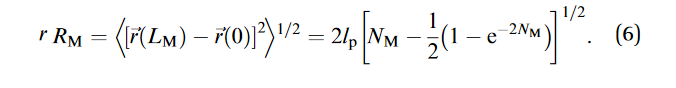

### Simulation Structure Factor:

##### Sources

macroletters

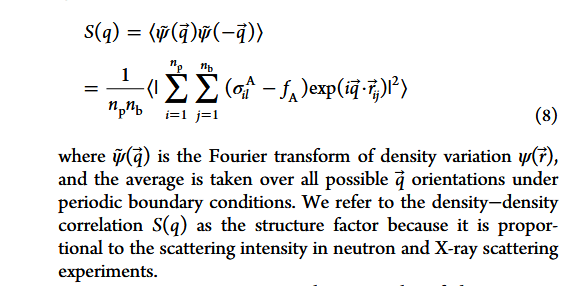

soft matter

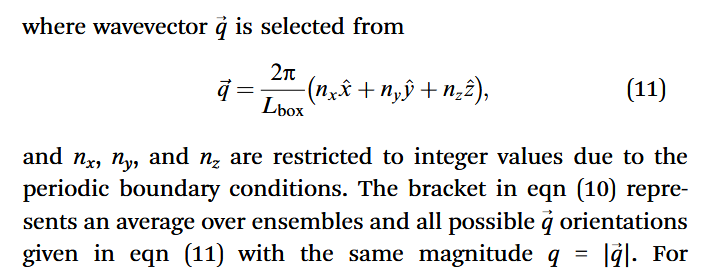

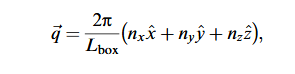

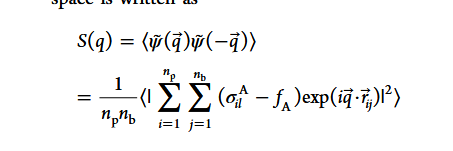

##### Helper functions

In [26]:
def gen_triples_vector(rnge):
    #to make sute itertools.combinations creates all permutations
    lst = []
    for i in range(rnge):
        lst += ([i]*3)
    return lst

In [27]:
def get_mag_vec_map(rnge, l_box = 20):
    comb_dict = {}
    #gen apropraiate vector
    trips = gen_triples_vector(rnge)
    for comb in itertools.combinations(trips, 3):
        comb = np.array(comb)
        comb_mag = np.linalg.norm(comb* (2*np.pi/l_box))
        # if comb_mag not in dictionary
        if comb_mag not in comb_dict:
            comb = comb * (2*np.pi/l_box)
            permutes = list(itertools.permutations(comb))
            for i in range(len(permutes)):
                #permutes[i] = list(permutes[i])
                permutes[i] = np.array(list(permutes[i]))
            permutes = np.unique(np.array(permutes), axis=0)
            comb_dict[comb_mag] = permutes
    return comb_dict

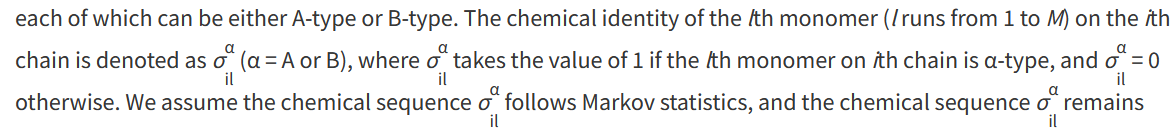

In [28]:
def get_sigma_array(df, bead_type):
    sigma = np.array([])
    
    if bead_type == "A":
        sigma = df.Type
        
    elif bead_type == "B": #reverse the sigma 
        sigma = df.Type.replace([0, 1], [1, 0])
        
    return sigma

In [29]:
def structure_factor_from_sim(df, q_vectors, n_p, n_b, f_A, phi_poly=1, l_box=20, bead_type = "A"):
    '''
    structure factor. Calculates the value of the structure factor for a single magnitude of q (set of q vectors 
    with the same magnitude)  
    q_vectors is a list of vectors with same magnitude
    '''
    
    sigma = get_sigma_array(df, bead_type)
                
    sum_avg = 0
    for q_vect in q_vectors:
        summ = 0
        A = sigma - f_A*phi_poly #replaced df.Type with sigma
        B = 1j*np.dot(df.iloc[:,:3], q_vect)
        summ = (A*np.exp(B)).sum()            
        sum_avg += (np.absolute(summ)**2)/(np.shape(q_vectors)[0])#q_vectors.size
    return sum_avg * (1/(n_p*n_b))
    

In [30]:
def get_bin_ind_dict(num_bins_per_side):
    '''
    returns a dictionary that maps the 1D bin index in the sim output to the 3D bin position
    '''
    tot_num_bins = num_bins_per_side**3
    indicies = np.arange(1, tot_num_bins+1)
    bin_ind_dict = {}

    for iz in np.arange(1,num_bins_per_side + 1):
        for iy in np.arange(1,num_bins_per_side + 1):
            for ix in np.arange(1,num_bins_per_side + 1):
                threeD_ind = [ix, iy, iz]
                threeD_position = [ix-0.5, iy-0.5, iz-0.5]
                oneD_ind = (ix + (iy-1)*20 + (iz-1)*400) - 1 # from mc_int.f03. subtract 1 for python 0 indexing
                bin_ind_dict[oneD_ind] = threeD_position
                
    return bin_ind_dict

In [31]:
dicti = {"a": 1, "b": 2, "c": 3, "d": 4}
np.array(list(dicti.values()))

array([1, 2, 3, 4])

In [32]:
def structure_factor_from_sim_bins(df, q_vectors,  bin_pos_array, tot_num_bins, bead_type = "A"):
    '''
    structure factor from bins. Calculates the value of the structure factor for a single magnitude of q (set of q vectors 
    with the same magnitude)  
    q_vectors is a list of vectors with same magnitude
    '''
    #tot_num_bins = num_bins_per_side**2
    #bin_ind_dict = get_bin_ind_dict(num_bins_per_side)
    #bin_pos_array = np.array(list(bin_ind_dict.values()))  #can move these lines out
    
    if bead_type == "A":
        phis = df.Phi_A
    elif bead_type == "B":
        phis = df.Phi_B
    elif bead_type == "Solvent":
        print("NOT IMPLEMENTED")
        ##TODO
        
    sum_avg = 0
    for q_vect in q_vectors:
        summ = 0
        A = phis #"BIN VOLUME FRACTION"
        B = 1j*np.dot(bin_pos_array, q_vect) #bin pos
        summ = (A*np.exp(B)).sum()            
        sum_avg += (np.absolute(summ)**2)/(np.shape(q_vectors)[0])#q_vectors.size
    return sum_avg * (1/tot_num_bins)

##### Calculating structure factor

In [33]:
%%time
#MOST ROBUST SOLUTION
mag_vects_map = get_mag_vec_map(20, l_box = 20)
sorted_magnitudes = sorted(mag_vects_map.keys())
sort_mags = np.array(sorted_magnitudes)           

# for phi sf calculations
tot_num_bins = num_bins_per_side**2
bin_ind_dict = get_bin_ind_dict(num_bins_per_side)
bin_pos_array = np.array(list(bin_ind_dict.values()))

structure_fact_array_list = []
for df_pair in df_chi_list:
    df_list = df_pair[0]
    chi_value = df_pair[1]
    n_p = df_pair[2]
    phi_poly = n_p/2000
    print(n_p)

    structure_fact_array = np.array([])
    for mag in sorted_magnitudes:
        q_vectors = mag_vects_map[mag]
        sf_average = 0
        for df in df_list: #avging over ensembles
            if df.columns[0] == "X":
                sf = structure_factor_from_sim(df, q_vectors, n_p, n_b, f_A, phi_poly, l_box=20, bead_type = bd_type)
            elif df.columns[0] == "Phi_A":
                sf = structure_factor_from_sim_bins(df, q_vectors, bin_pos_array, tot_num_bins, bead_type = bd_type)
            sf_average += sf/(len(df_list)) 
        structure_fact_array = np.append(structure_fact_array, sf_average)
    structure_fact_array_list.append([structure_fact_array, chi_value, phi_poly])

1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
Wall time: 1min 49s


In [41]:
print(len(sort_mags))

701


In [34]:
(40*L0)/l_kuhn #num kuhn lengths per polymer

0.39999999999999997

In [35]:
N_M * 8 #num kuhn lengths per polymer

0.39999999999999997

### Theoretical Structure Factor:
##### from 2016 Macromolecules- ABmelt

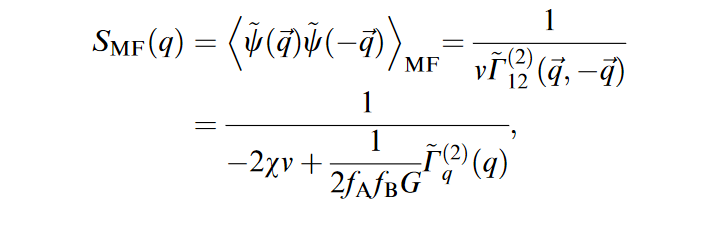

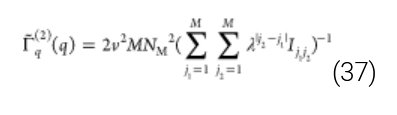

In [36]:
# R_M_kuhn = np.sqrt(eng.r2wlc(float(N_M))) #end-to-end monomer seperation in kuhn lengths
# mags_kuhn = (np.array(sorted_magnitudes)/R_M_kuhn)*R_M #how Q should be for this function
# Q_matlab = matlab.double(mags_kuhn.tolist()) #function needs it in terms of R_M_kuhn

# num_monomers = 8#*2000
# sinv = eng.s2invwlc(matlab.double([num_monomers]), matlab.double([N_M]), matlab.double([f_A]), matlab.double([lambda_val]), Q_matlab)
# sinv_arr = np.array([])
# for elem in sinv:
#     sinv_arr= np.append(sinv_arr, float(np.array(elem)))


##### from wlcstat (updated)- ABmelt

In [37]:
# #alpha_mx = 25 #rigid
# alpha_mx = 11 #flexible
# s2_aa, s2_ab, s2_bb = np.real(s2_wlc_randcopoly(mags_kuhn, float(N_M), num_monomers, f_A, lambda_val, alpha_max = alpha_mx))

In [38]:
# gamma = (s2_aa + s2_bb + 2*s2_ab)/(s2_aa * s2_bb - s2_ab**2)
# chival = 0
# coef = 1/(2*f_A*(1-f_A)*5)
# structurefactor = np.real(1/(-2*chival + coef*gamma))

###### Calc X_spinodal:

In [39]:
# # X*v_m
# [kval, sval, d2gam2] = eng.kmaxwlc(matlab.double([num_monomers]), matlab.double([N_M]), matlab.double([f_A]), matlab.double([lambda_val]), nargout=3)
# chi_spin = .5 * sval
# chi_comparison = (chi_spin/5) * 2 #chi = chi_s(no v_m) * 2
# chi_comparison #0.333

# #alt calc assuming its not x*v_m 
# chi_comp = chi_spin * 2
# chi_comp #1.66 is X_s * 2. Not in terms of vm

### Plotting

Text(0.5, 1.0, 'B structure factor: phi_poly = 0.875/n_p = 1750.0, selective')

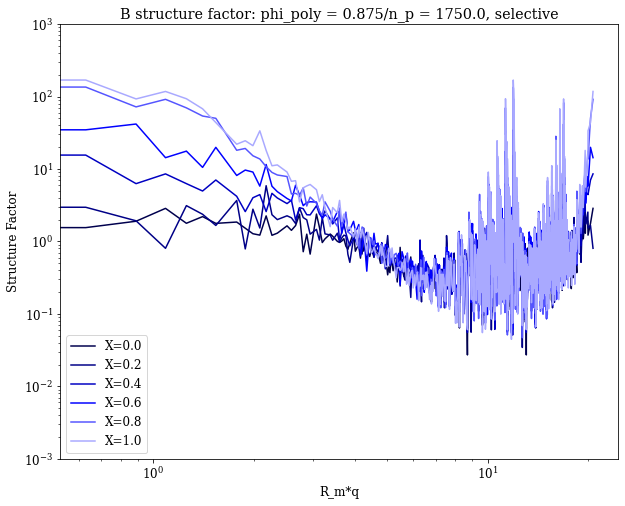

In [40]:
sort_magss = np.array(sorted_magnitudes)
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 12}
plt.rc('font', **font)


#simulation
old_phi_poly = None
COLOR = iter(cm.seismic(np.linspace(0, 1, len(structure_fact_array_list)+7)))
for sf_pair in structure_fact_array_list:
    structure_fact_array = sf_pair[0]
    chi_value = sf_pair[1]
    phi_poly = sf_pair[2]
    
    #coloring
    if old_phi_poly == None:
        old_phi_poly = phi_poly
    if phi_poly == old_phi_poly:
        clr = next(COLOR)
    else:
        clr = next(COLOR)
        clr = next(COLOR)
        old_phi_poly = phi_poly
    
    plt.loglog(sort_mags*R_M, structure_fact_array, \
               zorder=1, color = clr, label = "X=" + str(chi_value))# + ", phi_poly = " + str(phi_poly))

    
#2016 MFT

#plt.loglog(mags_kuhn*R_M_kuhn, (1/(sinv_arr)), label = "2016 MFT, X=0", color = "orange", alpha = 1, linestyle='dashed', zorder=5)

#plt.loglog(mags_kuhn*R_M_kuhn, (1/(-2*chi_spin*.8+sinv_arr)), label = "2016 MFT, X=.8X_s", color = "gray", linestyle='dashed', zorder=5)


#wlcstat

#plt.loglog(mags_kuhn*R_M_kuhn, structurefactor*16, label = "wlcstat X=0", alpha = 1, color = "red", linestyle='dotted', linewidth=4, zorder=6)

#plt.loglog(mags_kuhn*R_M_kuhn, np.real(1/(-2*10.6 + coef*gamma))*16, label = "wlcstat X=10.6", color = "orangered", linewidth=4, linestyle='dotted', zorder=8) #*R_M

plt.legend()
plt.xlabel(r'R_m*q') #R_m*
plt.ylabel(r'Structure Factor')
plt.ylim((10e-4, 1e3))
#plt.title("melt structure factor: N_M = 0.05 (rigid), lambda = 0, X = 0")
#plt.title("melt structure factor: N_M = 5 (flexible), lambda = -0.5")
#plt.title(bd_type + "-" + bd_type + " structure factor: phi_poly = 0.5, nonselective")
plt.title(bd_type + " structure factor: phi_poly = " + str(phi_poly) + "/n_p = " + str(n_p) + ", selective")
#plt.title(" A-A structure factor: phi_poly = 0.5, selective")
#plt.title(bd_type + "-" + bd_type + " sim structure factor, selective")
#do full check w/ theory!